# Importing Neccessary Library

In [568]:
import numpy as np
# pandas for dataframe
import pandas as pd
#Matplotlib for visualization
import matplotlib.pyplot as plt
#display the plot in notebook
%matplotlib inline
#Visualisation
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
#tain and test 
from sklearn.model_selection import train_test_split
#display accuracy score
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,classification_report
#model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score

# Data Preperation

# Importing The Pulsar_Stars F


In [570]:
pulsar=pd.read_csv("D://machine learning 2//pulsar_stars.csv")

# Checking Wether The File is Import

In [571]:
pulsar.head(4)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0


In [572]:
# Checking The Index of Dataset

In [573]:
pulsar.keys()

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

# Checking The min,max,mean etc of The Dataset

In [574]:
pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


# Checking The Row And Column of The Data

In [575]:
pulsar.shape

(17898, 9)

# Changing  All The Coloumn into Small Letter

In [576]:
pulsar.columns=map(str.lower,pulsar.columns)

# Removing The Space Between Two Letter

In [577]:
pulsar.rename(columns={" mean of the integrated profile":"mean_of_the_integrated_profile",
                       " standard deviation of the integrated profile":"standard_deviation_of_the_integrated_profile",
                       " excess kurtosis of the integrated profile":"excess_kurtosis_of_the_integrated_profile",
                       " skewness of the integrated profile":"skewness_of_the_integrated_profile",
                       " mean of the dm-snr curve":"mean_of_the_dm_snr_curve",
                       " standard deviation of the dm-snr curve":"standard_deviation_of_the_dm_snr_curve",
                       " excess kurtosis of the dm-snr curve":"excess_kurtosis_of_the_dm-snr_curve",
                       " skewness of the dm-snr curve":"skewness_of_the_dm-snr_curve"},inplace=True)

# Checking Wether All the Coloumn Name Change in Small Letter And All The Space Remove

In [578]:
pulsar.head(1)

,mean_of_the_integrated_profile,standard_deviation_of_the_integrated_profile,excess_kurtosis_of_the_integrated_profile,skewness_of_the_integrated_profile,mean_of_the_dm_snr_curve,standard_deviation_of_the_dm_snr_curve,excess_kurtosis_of_the_dm-snr_curve,skewness_of_the_dm-snr_curve,target_class
0,140.5625,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0


# Checking The Data Type

In [579]:
pulsar.dtypes

mean_of_the_integrated_profile                  float64
standard_deviation_of_the_integrated_profile    float64
excess_kurtosis_of_the_integrated_profile       float64
skewness_of_the_integrated_profile              float64
mean_of_the_dm_snr_curve                        float64
standard_deviation_of_the_dm_snr_curve          float64
excess_kurtosis_of_the_dm-snr_curve             float64
skewness_of_the_dm-snr_curve                    float64
target_class                                      int64
dtype: object

# EDA(EXPLORATORY DATA ANALYSIS)

# HISTOGRAM

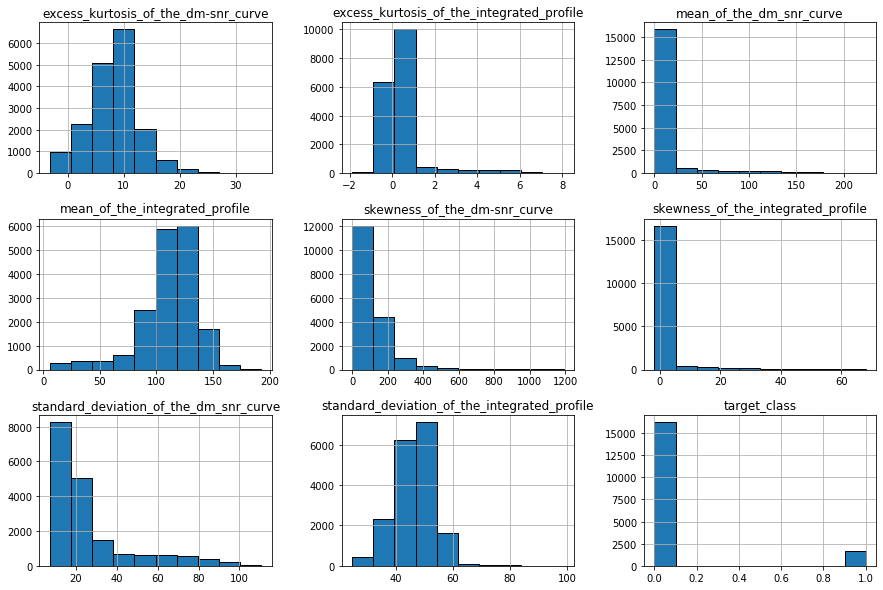

In [580]:
pulsar.hist(figsize=(15,10),edgecolor="black")
plt.show()

# PAIRPLOT


c:\users\tushar singh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\tushar singh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


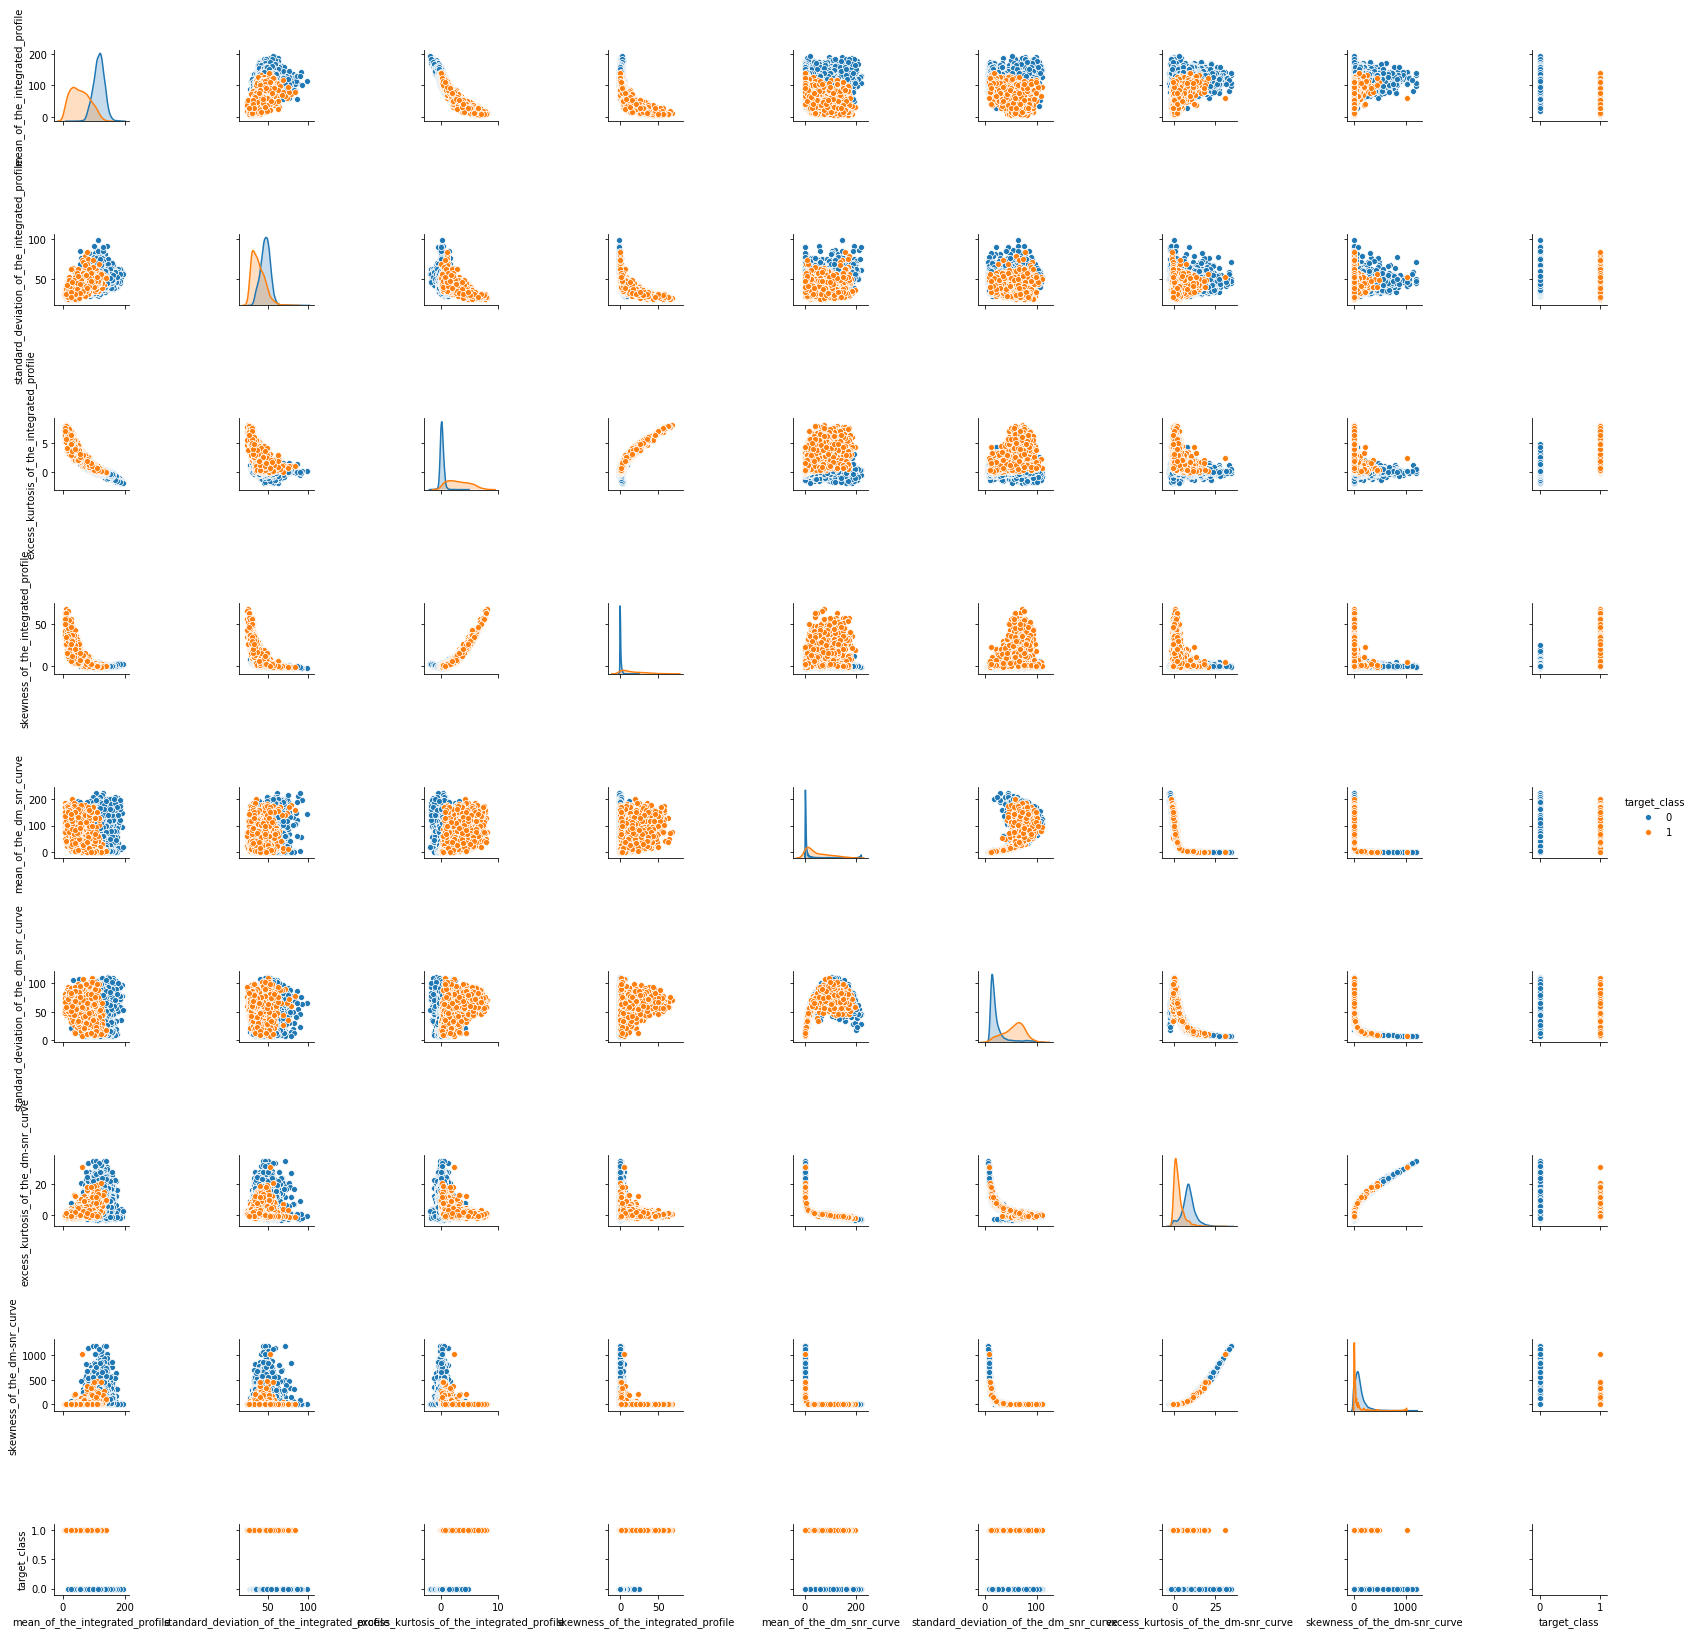

In [581]:
sns.pairplot(pulsar,hue="target_class")

# Heat-Map

In [582]:
pulsar_corr=pulsar.corr()

<function matplotlib.pyplot.show(*args, **kw)>

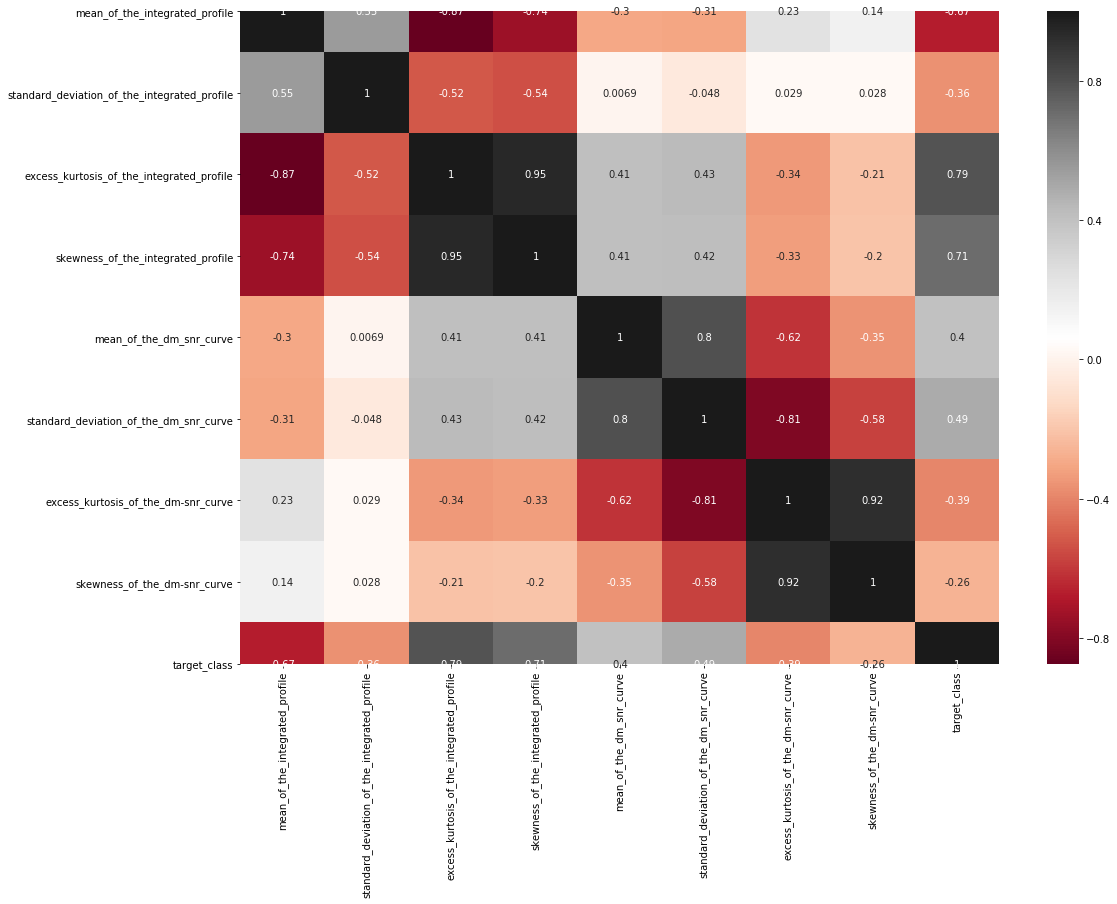

In [583]:
fig=plt.figure(figsize=(17,12))
sns.heatmap(pulsar_corr,annot=True,cmap="RdGy")
plt.show

# Pre-Processing

# Checking Null-Values

In [584]:
pulsar.isna().sum()

mean_of_the_integrated_profile                  0
standard_deviation_of_the_integrated_profile    0
excess_kurtosis_of_the_integrated_profile       0
skewness_of_the_integrated_profile              0
mean_of_the_dm_snr_curve                        0
standard_deviation_of_the_dm_snr_curve          0
excess_kurtosis_of_the_dm-snr_curve             0
skewness_of_the_dm-snr_curve                    0
target_class                                    0
dtype: int64

# Split The Data  For Training and Testing 


In [585]:
y=pulsar["target_class"]
x=pulsar.drop("target_class",axis=1)


In [586]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=28)

In [587]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12528, 8)
(5370, 8)
(12528,)
(5370,)


# Model Building

# DecisionTreeClassifier

In [588]:
pulsardt=DecisionTreeClassifier()
pulsardt=DecisionTreeClassifier(criterion="gini",splitter="best")
pulsardt.fit(x_train,y_train)
prdiction=pulsardt.predict(x_test)

In [589]:
output=pd.DataFrame({"Actual":y_test,"predicted":prdiction})
print(output)

       Actual  predicted
10782       0          0
6010        0          0
3655        0          0
14206       0          0
13141       0          0
...       ...        ...
17624       0          0
17116       0          0
5255        0          0
265         0          0
2190        0          0

[5370 rows x 2 columns]


In [590]:
print("accuracy of the model:",accuracy_score(y_test,prdiction))

accuracy of the model: 0.9741154562383613


# AdaBoostClassifier

In [591]:
adab=AdaBoostClassifier()
adab=AdaBoostClassifier(algorithm="SAMME.R",n_estimators=50)
adab.fit(x_train,y_train)
predic=adab.predict(x_test)

In [592]:
outputadab=pd.DataFrame({"Actual":y_test,"predicted":predic})
print(outputadab)

       Actual  predicted
10782       0          0
6010        0          0
3655        0          0
14206       0          0
13141       0          0
...       ...        ...
17624       0          0
17116       0          0
5255        0          0
265         0          0
2190        0          0

[5370 rows x 2 columns]


In [593]:
print("accuracy of the model:",accuracy_score(y_test,predic))

accuracy of the model: 0.9798882681564246


# BaggingClassifier

In [594]:
bagg=BaggingClassifier()
bagg=BaggingClassifier(bootstrap=True,warm_start=False)
bagg.fit(x_train,y_train)
predict=bagg.predict(x_test)

In [595]:
BaggingClassifier()

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [596]:
outputbagg=pd.DataFrame({"Actual":y_test,"predicted":predict})
print(outputadab)

       Actual  predicted
10782       0          0
6010        0          0
3655        0          0
14206       0          0
13141       0          0
...       ...        ...
17624       0          0
17116       0          0
5255        0          0
265         0          0
2190        0          0

[5370 rows x 2 columns]


In [597]:
print("accuracy of the model:",accuracy_score(y_test,predict))

accuracy of the model: 0.9802607076350093


# RandomForestClassifier

In [560]:
rf=RandomForestClassifier()
rf=RandomForestClassifier(bootstrap=True,max_leaf_nodes=183)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\tushar singh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [562]:
outputrf=pd.DataFrame({"Actual":y_test,"predicted":prediction})
print(outputrf)

       Actual  predicted
10782       0          0
6010        0          0
3655        0          0
14206       0          0
13141       0          0
...       ...        ...
17624       0          0
17116       0          0
5255        0          0
265         0          0
2190        0          0

[5370 rows x 2 columns]


In [563]:
print("accuracy of the model:",accuracy_score(y_test,prediction))

accuracy of the model: 0.982122905027933


# Model Accuracy is 0.98 means 98.2122905027933% Which is Best

# R2 Score 

In [564]:
r2_score(y_test,prediction)

0.7836146164229925

# R2 Score is 0.7836146164229925 Means 78.36146164229925